# Business Understanding

Conducting research on testcase prioritization especially in initial stages of software test cycle in companies

This data was gathered in [Jan, 2021], from a local industry's MIS, developed by a software team worked on company's whole software package including their management system.
The dataset is in .csv format, there are 1314 rows and 8 columns in this data set. The detail of these eight attributes are as under:

**B_Req**
Business Requirement


**R_Priority**
Requirement Priority of particular business requirement


**Weights**
Assigned weightage against "R_Priority(Requirement Priority)


**FP**
Function point of each testing task, which in our case are test cases against each requirement under covers a particular FP


**Complexity**
Complexity of a particular function point or related modules


**Time**
Estimated max time assigned to each Function Point of particular testing task


**Cost**
Calculated cost for each function point using complexity and time with function point estimation technique to calculate cost


**Priority**
assigned testcases Priority against each Function Point by the testing team.

The dataset can be used to analyze and apply classification or any machine learning algorithm to prioritize testcases.

In [269]:
# Setting up the environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import (classification_report,
                             confusion_matrix,
                             accuracy_score,
                             ConfusionMatrixDisplay)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_text

# Data comprehension and cleaning

In [270]:
# Load the dataset
df = pd.read_csv('Test_Project_MIS.csv')

In [271]:
# Display first 5 rows
print("First 5 rows:")
display(df.head())

First 5 rows:


,B_Req,R_Priority,Weights,FP,Complexity,Time,Cost,Priority
0,"1,C,3,""T-mis-2708,T-mis- 2151,T-mis- 560,T-mis...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,C,3.0,T-mis-1755,3.0,4.0,84.0,High
2,3,W,3.0,T-mis-3227,3.0,1.5,31.5,Medium
3,"4,S,2,""T-mis-2440,T-mis- 2659,T-mis- 1510"",1,4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"5,C,3,""T-mis-2912,T-mis- 2042,T-mis- 1020"",5,4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [272]:
# pint the shape of data
df.shape

(1313, 8)

In [273]:
# Dataset information
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   B_Req       1313 non-null   object 
 1   R_Priority  328 non-null    object 
 2   Weights     328 non-null    float64
 3   FP          328 non-null    object 
 4   Complexity  328 non-null    float64
 5   Time        328 non-null    float64
 6   Cost        328 non-null    float64
 7   Priority    328 non-null    object 
dtypes: float64(4), object(4)
memory usage: 82.2+ KB


In [274]:
# check for nan values
df.isna().sum()

,0
B_Req,0
R_Priority,985
Weights,985
FP,985
Complexity,985
Time,985
Cost,985
Priority,985


In [275]:
# drop nan values
df.dropna(inplace=True)

In [276]:
df.isna().sum()

,0
B_Req,0
R_Priority,0
Weights,0
FP,0
Complexity,0
Time,0
Cost,0
Priority,0


In [277]:
# check for duplicates
df.duplicated().sum()

0

In [278]:
# Clean the FP feature
df_fp = df['FP'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).to_frame('FP')
df = df.drop('FP', axis=1).join(df_fp)
df['FP'] = df['FP'].str.strip()

# Convert data types
df['Weights'] = pd.to_numeric(df['Weights'], errors='coerce')
df['Complexity'] = pd.to_numeric(df['Complexity'], errors='coerce')
df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
df['Cost'] = pd.to_numeric(df['Cost'], errors='coerce')

# Create new features
df['FP_Count'] = df.groupby('B_Req')['FP'].transform('count')
df['Cost_Per_Time'] = df['Cost'] / df['Time']

# Export cleaned data
df.to_csv('Cleaned_Project_MIS.csv', index=False)

In [279]:
# save the processed data
df_new=pd.read_csv('Cleaned_Project_MIS.csv')

In [280]:
# Drop the FP_Count containing a unique value equal to 1
df_new=df_new.drop('FP_Count',axis=1)

In [281]:
# Handle categorical features
# Encode target variable
le = LabelEncoder()
df_new['Priority'] = le.fit_transform(df['Priority'])

label_encoder=LabelEncoder()
df_new['R_Priority']=label_encoder.fit_transform(df_new['R_Priority'])

# Convert 'B_Req' to string and extract only relevant IDs (keeping numbers)
df_new["B_Req"] = df_new["B_Req"].astype(str).str.extract(r'(\d+)')
# Convert to numeric, coercing errors to NaN
df_new["B_Req"] = pd.to_numeric(df_new["B_Req"], errors='coerce')

In [282]:
# Calculate the frequency of each FP value, Replace each FP value with its frequency in the dataset. This can be useful
fp_freq = df_new['FP'].value_counts(normalize=True)

# Map the frequencies to the FP column
df_new['FP_freq'] = df_new['FP'].map(fp_freq)

# Drop the original FP column
df_new = df_new.drop('FP', axis=1)

In [283]:
# Checking the features type
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   B_Req          328 non-null    int64  
 1   R_Priority     328 non-null    int64  
 2   Weights        328 non-null    float64
 3   Complexity     328 non-null    float64
 4   Time           328 non-null    float64
 5   Cost           328 non-null    float64
 6   Priority       328 non-null    int64  
 7   Cost_Per_Time  328 non-null    float64
 8   FP_freq        328 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 23.2 KB


# Modeling

In [284]:
# splitting the data
X = df_new.drop('Priority', axis=1)
y = df_new['Priority']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [285]:
# Train the model
add=DecisionTreeClassifier()
add.fit(X_train, y_train)

DecisionTreeClassifier()

In [286]:
# Predictions
y_pred = add.predict(X_test)

# Evaluation

Model Evaluation:
Accuracy: 0.61

Classification Report:
              precision    recall  f1-score   support

        High       0.15      0.29      0.20         7
         Low       0.79      0.79      0.79        29
      Medium       0.62      0.50      0.56        30

    accuracy                           0.61        66
   macro avg       0.52      0.53      0.52        66
weighted avg       0.65      0.61      0.62        66



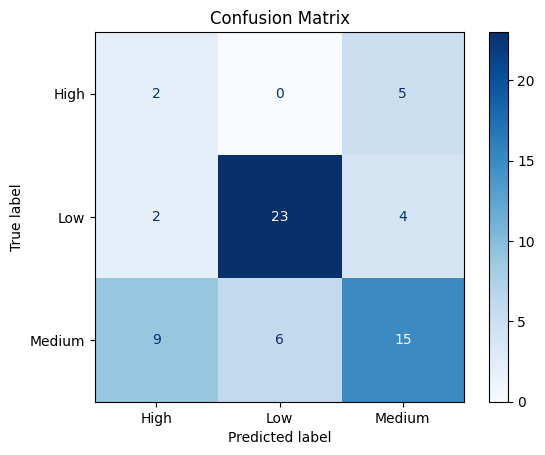

In [287]:
# Evaluation metrics
print("Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Plot he tree

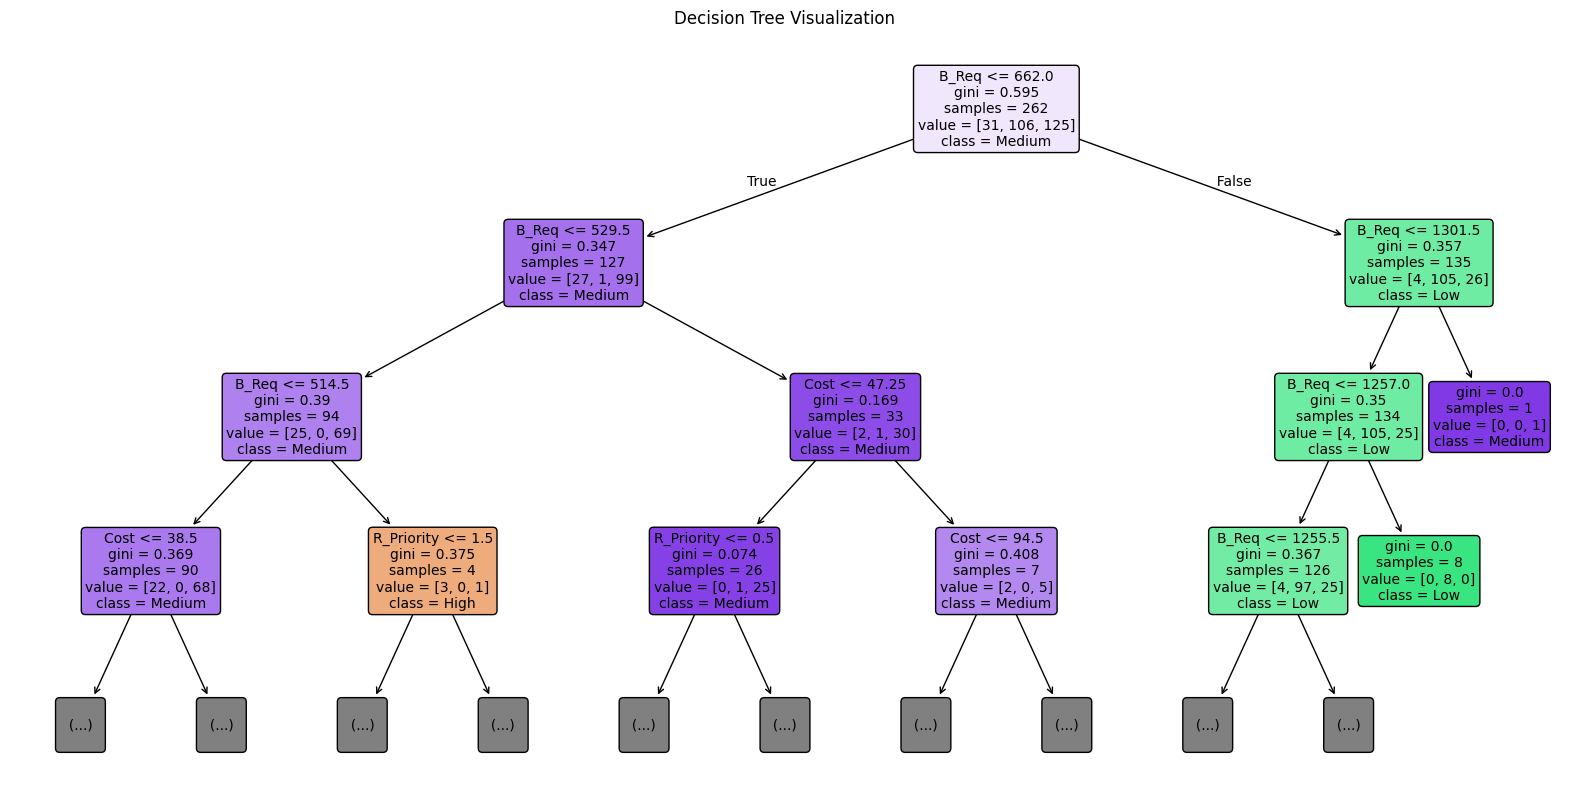

In [288]:
# ## 8. Visualize Decision Tree

plt.figure(figsize=(20, 10))
plot_tree(
    add,
    max_depth=3,
    feature_names=X.columns,
    class_names=le.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title('Decision Tree Visualization')
plt.show()

In [289]:
# Assuming 'clf' is your trained decision tree model
tree_rules = export_text(add, feature_names=list(X.columns))

print(tree_rules)  # Display the rules

|--- B_Req <= 662.00
|   |--- B_Req <= 529.50
|   |   |--- B_Req <= 514.50
|   |   |   |--- Cost <= 38.50
|   |   |   |   |--- Time <= 1.75
|   |   |   |   |   |--- Cost <= 8.75
|   |   |   |   |   |   |--- B_Req <= 127.00
|   |   |   |   |   |   |   |--- B_Req <= 67.50
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |--- B_Req >  67.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- B_Req >  127.00
|   |   |   |   |   |   |   |--- R_Priority <= 1.50
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |--- R_Priority >  1.50
|   |   |   |   |   |   |   |   |--- B_Req <= 347.50
|   |   |   |   |   |   |   |   |   |--- B_Req <= 331.50
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |--- B_Req >  331.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- B_Req >  347.50
|   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   

# Pritn the feature importance

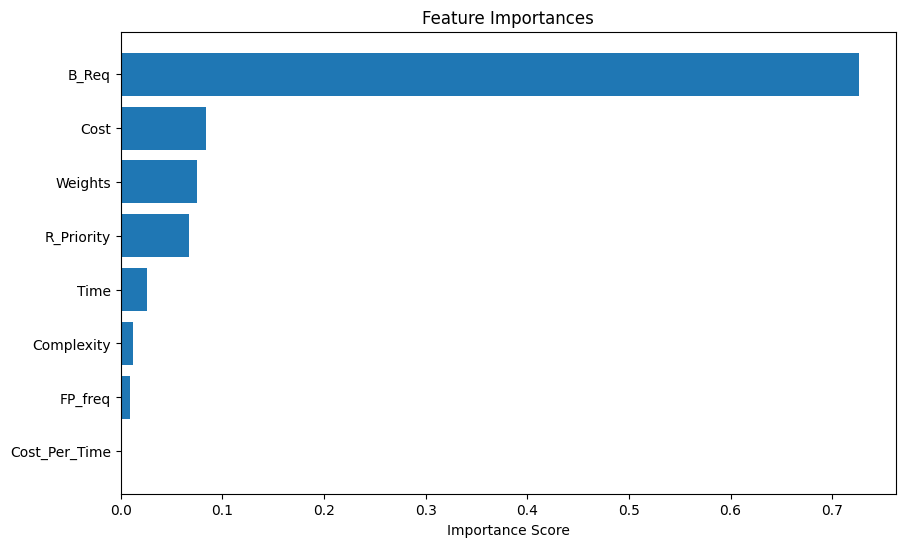

In [290]:
# ## 7. Feature Importance Analysis

# Extract feature importances
importances = add.feature_importances_

# Create DataFrame for visualization
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.show()